#  **Prediction using Decision Tree  Algorithm**

**Author - Samrat Mukherjee**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import sklearn.metrics as sm
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('/content/drive/MyDrive/IrisDataset/iris_dataset.csv', names = ['SepalLengthCm'	,'SepalWidthCm',	'PetalLengthCm'	, 'PetalWidthCm', 'Species'], header = None)

In [4]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data.shape

(150, 5)

In [8]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# **Changing the Species to a Numeric Value For better Classification**

In [10]:
def convert_target(data):
    if data == 'Iris-setosa':
        return 0
    elif data == 'Iris-versicolor':
        return 1
    else:
        return 2
data['Species'] = data['Species'].apply(convert_target)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [12]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# **Visualization**

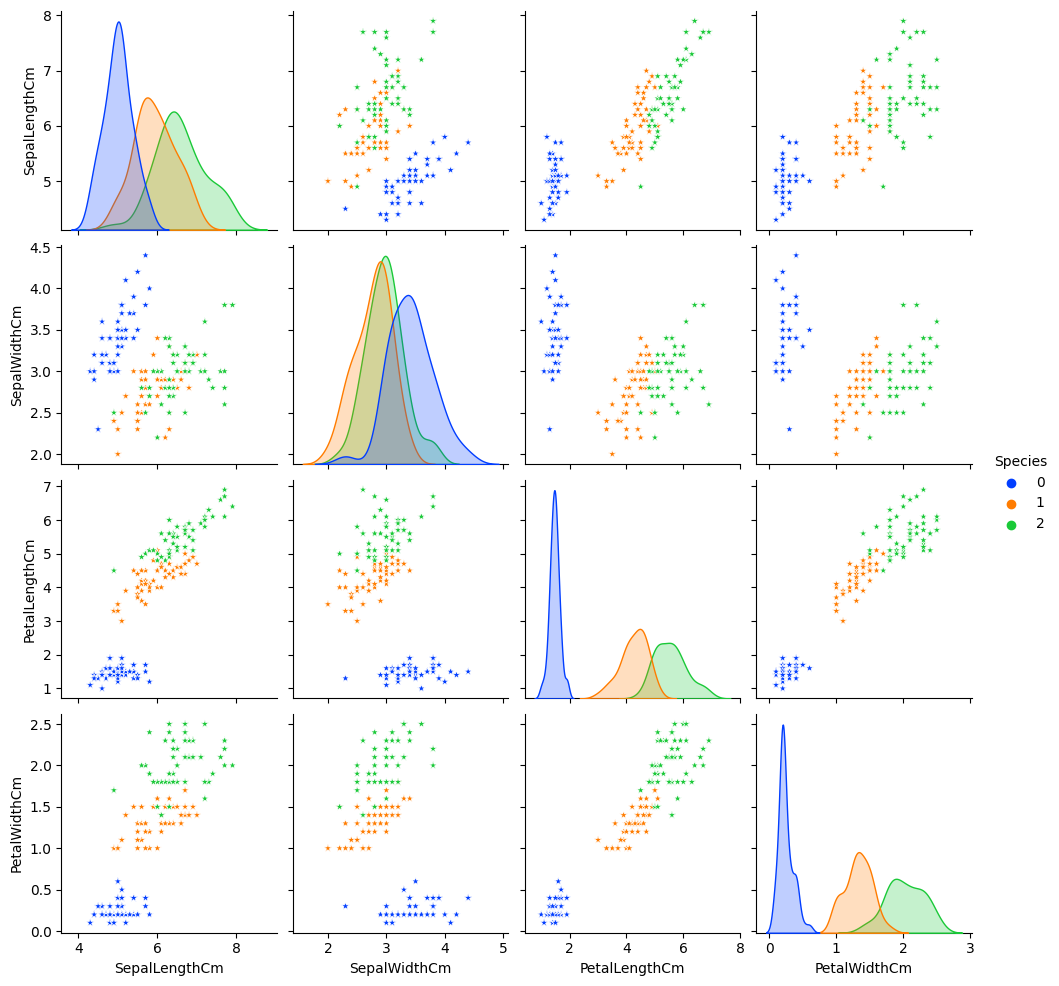

In [13]:
sns.pairplot(data, hue = 'Species', markers = '*', palette='bright')

# **Correlation**

<Axes: >

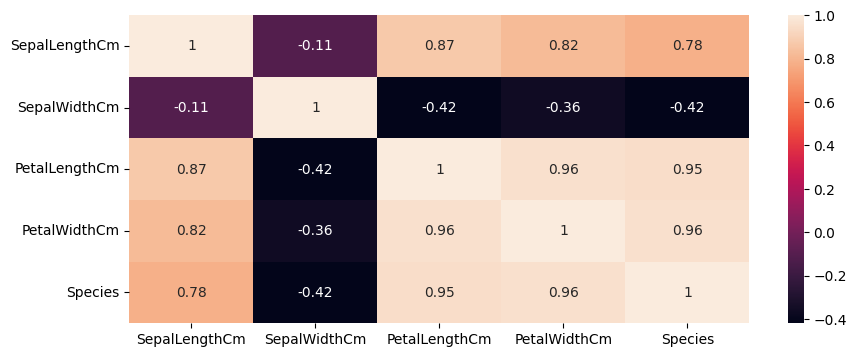

In [14]:
correlation_matrix=data.corr().round(2)
fig,ax=plt.subplots(figsize=(10,4))
sns.heatmap(data=correlation_matrix,annot=True)

**As their is no correlation between SepalWidthCm and Species(target) I will be Droping the respective Column.**

In [15]:
df = data.drop('SepalWidthCm', axis=1)

## **Outlier Detection**

SepalLengthCm Outliers: []
PetalLengthCm Outliers: []
PetalWidthCm Outliers: []


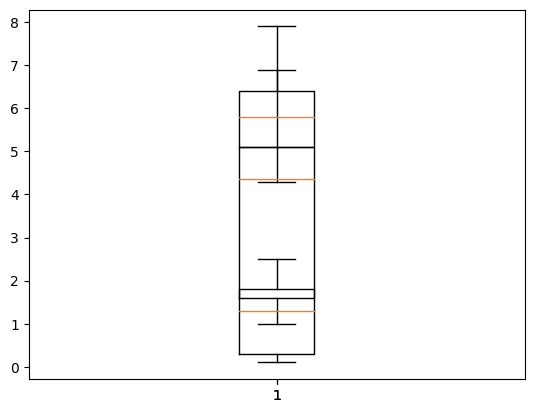

In [16]:
outliers1= plt.boxplot(df['SepalLengthCm'])["fliers"][0].get_data()[1]
outliers2= plt.boxplot(df['PetalLengthCm'])["fliers"][0].get_data()[1]
outliers3= plt.boxplot(df['PetalWidthCm'])["fliers"][0].get_data()[1]
print("SepalLengthCm Outliers:",outliers1)
print("PetalLengthCm Outliers:",outliers2)
print("PetalWidthCm Outliers:",outliers3)


**No Outliers Found**

# **Model Building**

In [17]:
x = df.drop(['Species'], axis=1)
y = df['Species']
print(x.shape)
print(y.shape)

(150, 3)
(150,)


**Splitting the data into test and train**

In [18]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(105, 3)
(105,)
(45, 3)
(45,)


In [19]:
# Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=3, min_samples_leaf=5)
dtree.fit(x,y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

# **Vizualiztion of Decision Tree**

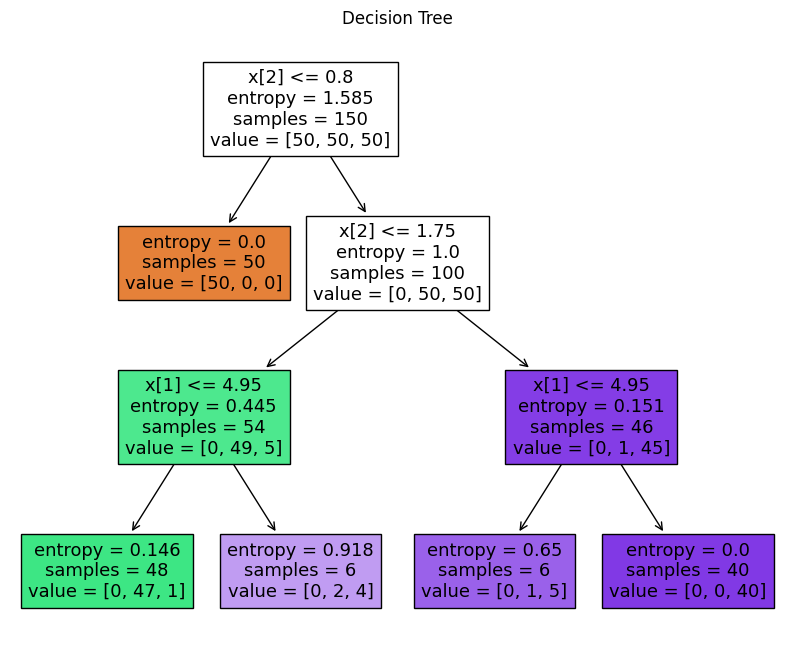

In [20]:
# this or above
from sklearn import tree
plt.figure(figsize = (10,8))
tree.plot_tree(dtree, filled=True)
plt.title("Decision Tree")
plt.show()

# **Accuracy**

In [21]:
y_pred = dtree.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred, normalize=True)
print(accuracy)

0.9777777777777777


# **Confusion Matrix**

<Axes: >

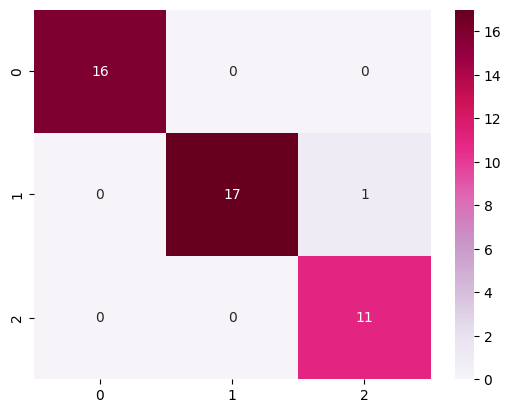

In [22]:
con = sm.confusion_matrix(y_test, y_pred)
sns.heatmap(con,annot=True,cmap='PuRd')